In [1]:
import pandas as pd

filename="results_integration.txt"

df_integration = pd.read_csv(filename, sep=" ", header=None, names=["Programa", "Threads", "Tamaño entrada 1", "Tiempo de ejecución"])
df_integration = df_integration.drop("Programa", 1)
df_integration

,Threads,Tamaño entrada 1,Tiempo de ejecución
0,1,100000,0.000
1,1,100000,0.001
2,1,100000,0.001
3,1,100000,0.000
4,1,100000,0.000
...,...,...,...
7495,50,10000000,0.022
7496,50,10000000,0.024
7497,50,10000000,0.022
7498,50,10000000,0.023


In [2]:
df_integration = df_integration.groupby(["Threads", "Tamaño entrada 1"]).describe()
df_integration = df_integration[[("Tiempo de ejecución",  "mean"), ("Tiempo de ejecución",  "std")]]
df_integration = df_integration.rename(columns={"mean": "Promedio", "std": "Desvío estándar"})
df_integration

Tiempo de ejecución                
                                    Promedio Desvío estándar
Threads Tamaño entrada 1                                    
1       100000                       0.00066        0.000688
        1000000                      0.00690        0.000647
        10000000                     0.05490        0.006560
2       100000                       0.00056        0.000611
        1000000                      0.00154        0.001073
...                                      ...             ...
49      1000000                      0.00434        0.002134
        10000000                     0.02122        0.001620
50      100000                       0.00266        0.000593
        1000000                      0.00392        0.001537
        10000000                     0.02178        0.001447

[150 rows x 2 columns]

In [3]:
df_integration.columns = [" - ".join(a) for a in df_integration.columns.to_flat_index()]
df_integration = df_integration.reset_index()

In [4]:
def get_difference(row):
    one_thread_time = df_integration[(df_integration["Threads"] == 1) & (df_integration["Tamaño entrada 1"] == row["Tamaño entrada 1"])]["Tiempo de ejecución - Promedio"].values[0]
    return row["Tiempo de ejecución - Promedio"] - one_thread_time

df_integration["Diferencia"] = df_integration.apply(get_difference, axis=1)
df_integration

,Threads,Tamaño entrada 1,Tiempo de ejecución - Promedio,Tiempo de ejecución - Desvío estándar,Diferencia
0,1,100000,0.00066,0.000688,0.00000
1,1,1000000,0.00690,0.000647,0.00000
2,1,10000000,0.05490,0.006560,0.00000
3,2,100000,0.00056,0.000611,-0.00010
4,2,1000000,0.00154,0.001073,-0.00536
...,...,...,...,...,...
145,49,1000000,0.00434,0.002134,-0.00256
146,49,10000000,0.02122,0.001620,-0.03368
147,50,100000,0.00266,0.000593,0.00200
148,50,1000000,0.00392,0.001537,-0.00298


<AxesSubplot:xlabel='Threads', ylabel='Tiempo de ejecución - Promedio'>

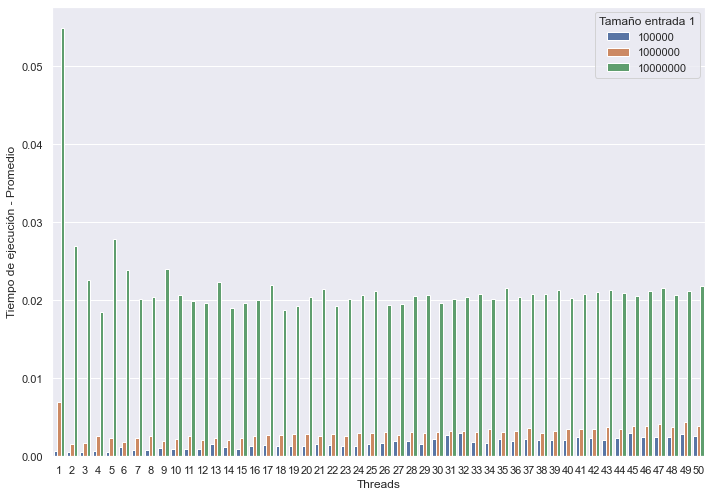

In [5]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.barplot(data=df_integration, x="Threads", y="Tiempo de ejecución - Promedio", hue="Tamaño entrada 1")

<AxesSubplot:xlabel='Tamaño entrada 1', ylabel='Tiempo de ejecución - Promedio'>

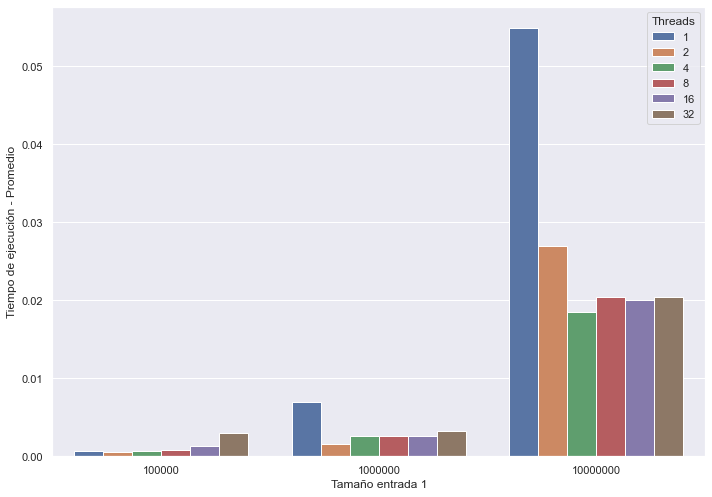

In [6]:
df_integration_filtered = df_integration[(df_integration["Threads"] & df_integration["Threads"] - 1) == 0]

sns.barplot(data=df_integration_filtered, hue="Threads", y="Tiempo de ejecución - Promedio", x="Tamaño entrada 1")